In [1]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)

import random
import time
import pickle

import sys
sys.path.append("../")

from src.object import *
from src.create import *
from src.print_result import *

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
with open('../data/pickle/20221009v2_30y.pickle', mode='rb') as f:
    England = pickle.load(f)

In [3]:
#England = ProSoccerLeague(name="england", leagues=[L1, L2, L3])
all_member = pd.DataFrame()
for l in England.leagues:
    for t in l.teams:
        for p in t.affilation_players:
            buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "現役"]]), 
                                columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ", "pac", "sho", "pas", "dri", "def", "phy", "進退"])
            all_member = pd.concat([all_member, buff])
for p in England.retire_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate, p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "引退"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])

for p in England.free_players:
    buff = pd.DataFrame(np.array([[p.name, t.name, l.name, p.uuid, p.age, p.born_year, p.main_position, p.main_rate,  p.grow_type, p.pace, p.shooting, p.passing, p.dribbling, p.defending, p.physicality, "フリー"]]), 
                        columns = ["名前", "チーム", "リーグ", "uuid", "年齢", "生まれ年", "ポジション", "Rate", "成長タイプ","pac", "sho", "pas", "dri", "def", "phy", "進退"])
    all_member = pd.concat([all_member, buff])
all_member = all_member.reset_index(drop=True)

In [4]:
output = England.players_result

## Rateの分布

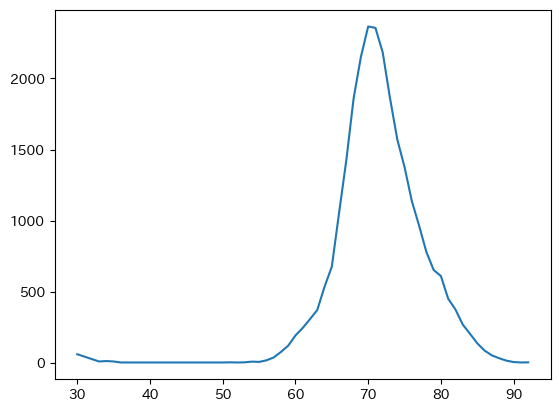

In [8]:
rate_list = output["Rate"].unique()
rate_list.sort()
rate_num = []
for rate in rate_list:
    rate_num.append(len(output.groupby("Rate").get_group(rate).groupby("uuid").mean()))
plt.plot(rate_list, rate_num)

## 18歳のRate

In [9]:
output[output["年齢"]==18]["Rate"].value_counts(), len(output[output["年齢"]==18])

(68    1718
 69    1524
 67    1332
 70    1156
 66     984
 71     684
 65     492
 72     390
 64     354
 63     188
 73     168
 61     132
 60     126
 62     110
 59      96
 74      74
 58      72
 75      58
 76      32
 57      30
 56      18
 78      12
 77       8
 79       6
 54       2
 55       2
 Name: Rate, dtype: int64,
 9768)

## 怪我割合

In [17]:
print(output["怪我欠場"].sum()/3/20/30)
print(output[output["試合数"]>0]["怪我欠場"].value_counts())

100.02777777777777
0     33680
1      3323
2      1708
3      1506
4      1434
5      1293
6      1229
7      1128
8      1005
9       936
10      861
11      759
12      706
13      581
14      570
15      495
16      463
17      414
18      351
19      337
20      299
21      231
23      195
22      188
24      151
25      128
27       97
26       93
28       80
29       62
30       59
32       55
31       41
34       29
33       24
36       16
35       15
37       12
Name: 怪我欠場, dtype: int64


## 90以上の人数

In [18]:
output[output["Rate"]>89].groupby("uuid").mean()

,年齢,Rate,残契約,年度,試合数,goal,assist,CS,怪我欠場
uuid,,,,,,,,,
160e951c-47da-11ed-b218-00155d14f69a,29.0,90.000,1.000,2001.0,16.333333,8.166667,1.166667,6.333333,6.166667
164e01fc-47da-11ed-b218-00155d14f69a,30.0,90.000,1.000,2000.0,4.500000,0.000000,0.000000,1.000000,16.000000
1698e460-47da-11ed-b218-00155d14f69a,27.5,91.000,0.750,2004.5,17.250000,0.500000,0.437500,6.812500,4.250000
16a0d8d2-47da-11ed-b218-00155d14f69a,27.5,92.000,0.500,2000.5,8.000000,0.250000,0.000000,3.250000,13.750000
2aa9eb42-47db-11ed-b218-00155d14f69a,27.0,90.000,1.200,2016.0,18.600000,0.900000,0.500000,9.500000,2.900000
f3849152-47db-11ed-b218-00155d14f69a,28.0,90.000,0.800,2021.0,18.900000,3.100000,2.400000,8.000000,2.800000
f38c253e-47db-11ed-b218-00155d14f69a,27.5,91.875,0.875,2020.5,15.562500,0.312500,0.562500,6.750000,5.937500


,名前,年齢,生まれ年,成長タイプ
2278,Truett,36,1982,genius


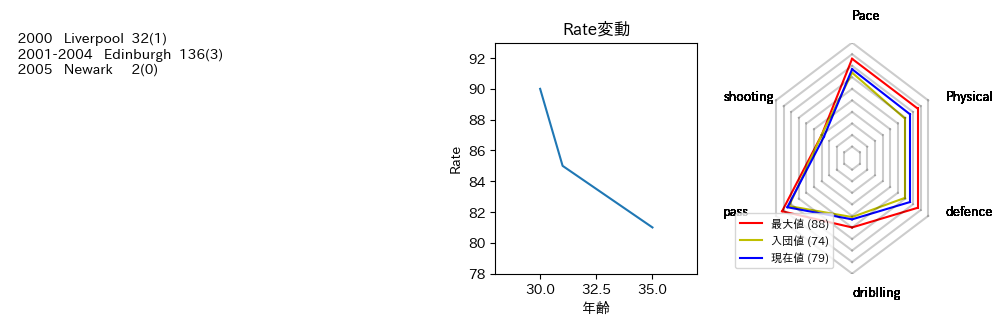

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,年度,チーム,分類,順位,試合数,goal,assist,CS,怪我欠場,賞
348,Truett,164e01fc-47da-11ed-b218-00155d14f69a,30,90,1,CB,premier,2000,Liverpool,リーグ,18位,9,0,0,2,31,
4076,Truett,164e01fc-47da-11ed-b218-00155d14f69a,31,85,1,CDM,premier,2001,Edinburgh,リーグ,2位,23,1,0,13,16,
7664,Truett,164e01fc-47da-11ed-b218-00155d14f69a,32,84,0,CDM,premier,2002,Edinburgh,リーグ,2位,37,0,1,11,1,
11248,Truett,164e01fc-47da-11ed-b218-00155d14f69a,33,83,1,CB,premier,2003,Edinburgh,リーグ,7位,36,2,2,16,3,
14832,Truett,164e01fc-47da-11ed-b218-00155d14f69a,34,82,0,CB,premier,2004,Edinburgh,リーグ,8位,26,0,3,8,13,
18348,Truett,164e01fc-47da-11ed-b218-00155d14f69a,35,81,0,CB,premier,2005,Newark,リーグ,4位,1,0,0,0,0,


In [22]:
uuid_ = "164e01fc-47da-11ed-b218-00155d14f69a"
print_player(England, all_member, uuid_)

## チーム能力

In [24]:
for t in England.leagues[0].teams:
    print(t.name, t.formation.team_rate)

Newark {'ATT': 80.33333333333333, 'MID': 76.25, 'DEF': 78.0, 'GK': 85, 'ALL': 78.63636363636364}
Budapest {'ATT': 77.0, 'MID': 72.75, 'DEF': 77.0, 'GK': 82, 'ALL': 75.9090909090909}
Paris {'ATT': 79.33333333333333, 'MID': 74.75, 'DEF': 79.66666666666667, 'GK': 80, 'ALL': 77.81818181818181}
Portsmouth {'ATT': 80.0, 'MID': 72.33333333333333, 'DEF': 74.75, 'GK': 85, 'ALL': 76.45454545454545}
Geneva {'ATT': 74.0, 'MID': 70.25, 'DEF': 65.33333333333333, 'GK': 80, 'ALL': 70.81818181818181}
Bangor {'ATT': 75.33333333333333, 'MID': 73.66666666666667, 'DEF': 74.5, 'GK': 81, 'ALL': 75.0909090909091}
Vienna {'ATT': 76.66666666666667, 'MID': 72.0, 'DEF': 77.0, 'GK': 84, 'ALL': 75.72727272727273}
Crewe {'ATT': 76.5, 'MID': 67.75, 'DEF': 75.25, 'GK': 75, 'ALL': 72.72727272727273}
Glasgow {'ATT': 83.5, 'MID': 68.5, 'DEF': 69.75, 'GK': 81, 'ALL': 72.81818181818181}
Stoke-on-Trent {'ATT': 83.66666666666667, 'MID': 79.66666666666667, 'DEF': 80.5, 'GK': 84, 'ALL': 81.45454545454545}
Edinburgh {'ATT': 75.

In [31]:
all_member[((all_member["進退"]=="引退")&(all_member["年齢"]==21))]

,名前,チーム,リーグ,uuid,年齢,生まれ年,ポジション,Rate,成長タイプ,pac,sho,pas,dri,def,phy,進退
1959,Bransen,Wolverhampton,EFL,183c8ab0-47da-11ed-b218-00155d14f69a,21,1982,GK,55,general,15,15,15,15,15,15,引退
2151,Irby,Wolverhampton,EFL,69439eee-47da-11ed-b218-00155d14f69a,21,1983,CDM,68,grass,57,49,66,67,67,68,引退
2677,Eston,Wolverhampton,EFL,04db8236-47db-11ed-b218-00155d14f69a,21,1987,ST,66,grass,67,67,51,61,31,53,引退
2683,Zackarie,Wolverhampton,EFL,04e42666-47db-11ed-b218-00155d14f69a,21,1987,ST,66,general,64,67,63,67,31,54,引退
2688,Irish,Wolverhampton,EFL,04e8a8bc-47db-11ed-b218-00155d14f69a,21,1987,ST,66,general,65,66,55,59,27,72,引退
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,Abe,Wolverhampton,EFL,293ac106-47df-11ed-b218-00155d14f69a,21,2008,ST,67,grass,52,68,63,63,32,68,引退
6785,Millard,Wolverhampton,EFL,291c7d7c-47df-11ed-b218-00155d14f69a,21,2008,CM,68,general,64,57,69,68,70,48,引退
6786,Dillon,Wolverhampton,EFL,29349326-47df-11ed-b218-00155d14f69a,21,2008,CM,67,grass,60,50,68,68,68,53,引退
6788,Stanly,Wolverhampton,EFL,292a31ec-47df-11ed-b218-00155d14f69a,21,2008,CB,68,general,67,36,68,58,66,66,引退
